In [14]:
import numpy as np
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

Label: Cat


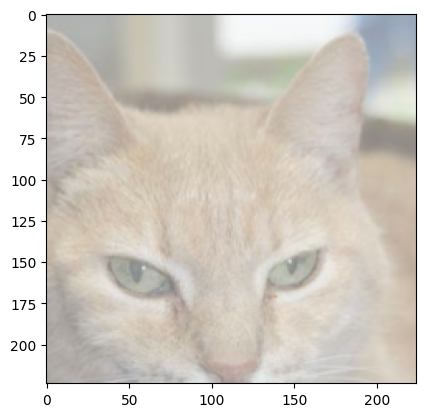

Label: Cat


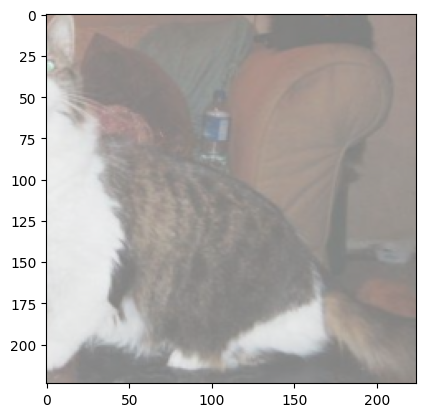

Label: Dog


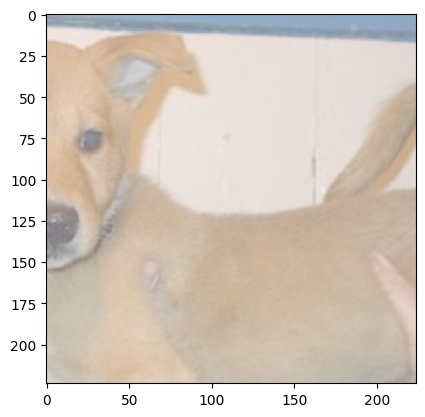

Label: Dog


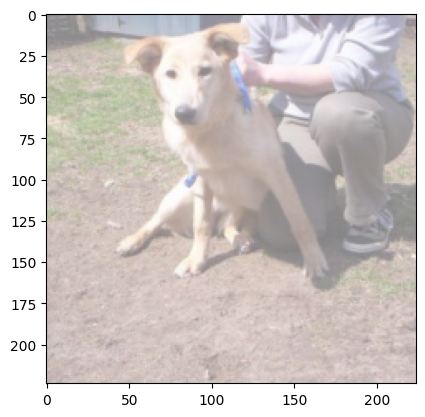

Label: Dog


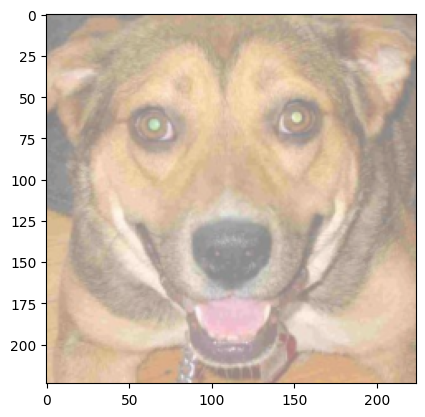

Label: Dog


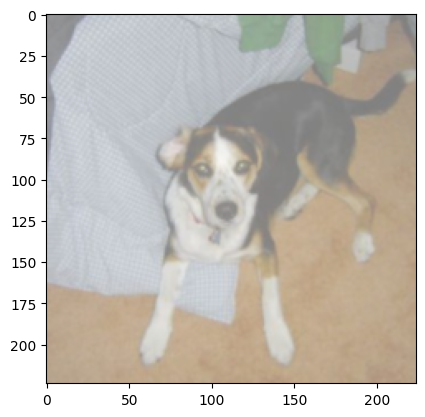

Label: Cat


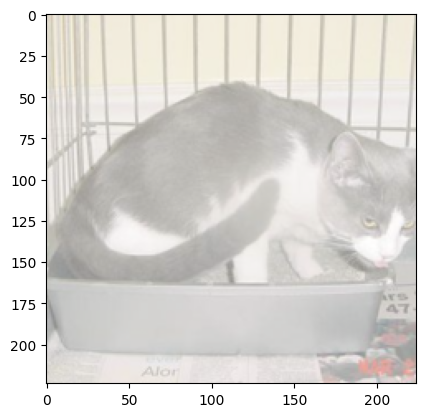

Label: Dog


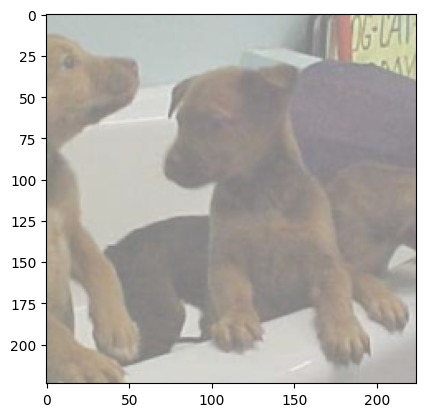

Label: Cat


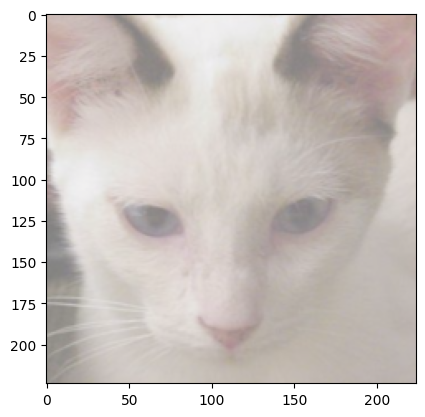

Label: Dog


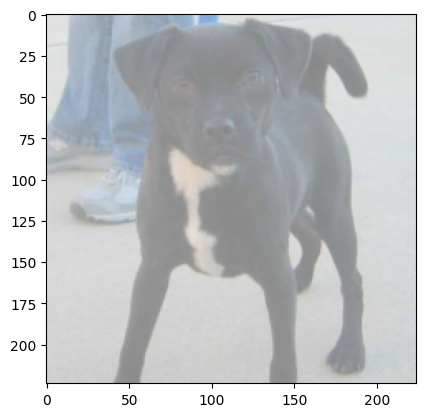

In [15]:
# Function to display an image
def imshow(img):
    img = img / 2 + 0.5  # unnormalize if normalization was applied during transformation
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Function to randomly select 10 images and labels
def get_random_images_labels(dataloader, num_samples=10):
    images = []
    labels = []
    while len(images) < num_samples:
        for batch_images, batch_labels in dataloader:
            batch_size = batch_images.size(0)
            indices = torch.randperm(batch_size)[:num_samples - len(images)]
            images.extend(batch_images[indices])
            labels.extend(batch_labels[indices])
            if len(images) >= num_samples:
                break
    return images, labels

transform = transforms.Compose([transforms.Resize(255),
                                transforms.CenterCrop(224),
                                transforms.ToTensor()
                               ])
train_dataset = datasets.ImageFolder('./processed_data/train', transform=transform)
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)

test_dataset = datasets.ImageFolder('./processed_data/test', transform=transform)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=True)

# Get 10 random images and labels
random_images, random_labels = get_random_images_labels(train_dataloader, 10)

# Display the images and their labels
for i in range(10):
    print("Label:", "Dog" if random_labels[i].item() == 1 else "Cat")
    imshow(random_images[i])
